D:\Anaconda3\envs\tensorflow2-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


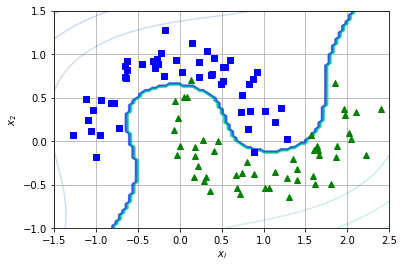

In [4]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons( n_samples=100, noise=0.15, random_state=42 )

def plot_dataset(X, y, axes):
    plt.plot( X[:,0][y==0], X[:,1][y==0], "bs" )
    plt.plot( X[:,0][y==1], X[:,1][y==1], "g^" )
    plt.axis( axes )
    plt.grid( True, which="both" )
    plt.xlabel(r"$x_l$")
    plt.ylabel(r"$x_2$")

# contour函数是画出轮廓，需要给出X和Y的网格，以及对应的Z，它会画出Z的边界（相当于边缘检测及可视化）
def plot_predict(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid( x0s, x1s )
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict( X ).reshape( x0.shape )
    y_decision = clf.decision_function( X ).reshape( x0.shape )
    plt.contour( x0, x1, y_pred, cmap=plt.cm.winter, alpha=0.5 )
    plt.contour( x0, x1, y_decision, cmap=plt.cm.winter, alpha=0.2 )

polynomial_svm_clf = Pipeline([ ("poly_featutres", PolynomialFeatures(degree=3)),
                                ("scaler", StandardScaler()),
                                ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42)  )
                            ])
polynomial_svm_clf.fit( X, y )
plot_dataset( X, y, [-1.5, 2.5, -1, 1.5] )
plot_predict( polynomial_svm_clf, [-1.5, 2.5, -1, 1.5] )
plt.show()

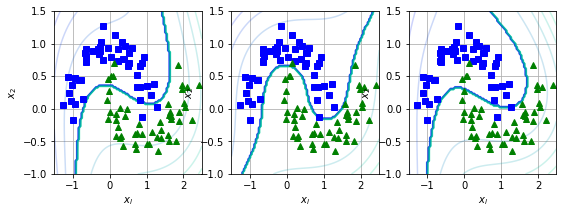

In [5]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([ ( "scaler", StandardScaler()),
                                 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=0.5))
                                ])
poly_kernel_svm_clf.fit(X,y)
plt.figure( figsize=(9,3) )
plt.subplot(131)
plot_dataset( X, y, [-1.5, 2.5, -1, 1.5] )
plot_predict( poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5] )
# plt.show()

poly_kernel_svm_clf = Pipeline([ ( "scaler", StandardScaler()),
                                 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=10))
                                ])
poly_kernel_svm_clf.fit(X,y)
plt.subplot(132)
plot_dataset( X, y, [-1.5, 2.5, -1, 1.5] )
plot_predict( poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5] )

poly_kernel_svm_clf = Pipeline([ ( "scaler", StandardScaler()),
                                 ("svm_clf", SVC(kernel="poly", degree=3, coef0=100, C=0.5))
                                ])
poly_kernel_svm_clf.fit(X,y)
plt.subplot(133)
plot_dataset( X, y, [-1.5, 2.5, -1, 1.5] )
plot_predict( poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5] )

plt.show()

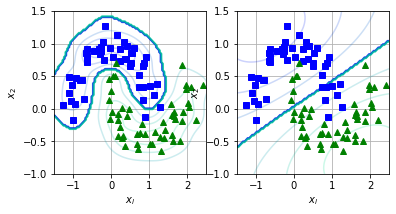

In [6]:
rbf_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()), 
                                ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
                            ])

plt.figure(figsize=(6,3))
plt.subplot(121)
rbf_kernel_svm_clf.fit( X, y )
plot_dataset( X, y, [-1.5, 2.5, -1, 1.5] )
plot_predict( rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5] )

rbf_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()), 
                                ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
                            ])
plt.subplot(122)
rbf_kernel_svm_clf.fit( X, y )
plot_dataset( X, y, [-1.5, 2.5, -1, 1.5] )
plot_predict( rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5] )
plt.show(  )

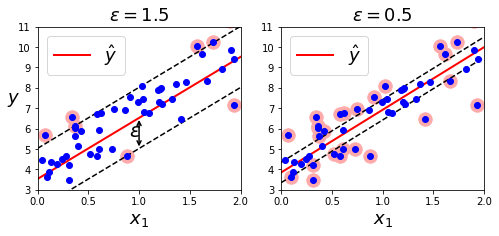

In [7]:
from sklearn.svm import LinearSVR
np.random.seed( 42 )
m = 50
X = 2*np.random.rand(m, 1)
y = (4+3*X+np.random.randn(m,1)).ravel()

# 找到训练集中所有支持向量的下标
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict( X )
    off_margin = np.abs(y-y_pred) >= svm_reg.epsilon
    # 返回off_margin中值为True的下标
    return np.argwhere( off_margin )

def plot_svm_regression( svm_reg, X, y, axes ):
    x1s = np.linspace( axes[0], axes[1], 100 ).reshape(-1,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot( x1s, y_pred, "r-", linewidth=2, label=r"$\hat{y}$" )
    plt.plot( x1s, y_pred-svm_reg.epsilon, "k--" )
    plt.plot( x1s, y_pred+svm_reg.epsilon, "k--" )
    plt.plot( X, y, "bo" )
    plt.scatter( X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors="#FFAAAA" )
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)


svm_reg_1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg_2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg_1.fit( X, y )
svm_reg_2.fit( X, y )

svm_reg_1.support_ = find_support_vectors( svm_reg_1, X, y )
svm_reg_2.support_ = find_support_vectors( svm_reg_2, X, y )

eps_x1 = 1
eps_y_pred = svm_reg_1.predict([[eps_x1]])

plt.figure( figsize=(8,3) )
plt.subplot(121)
plot_svm_regression( svm_reg_1, X, y, [0, 2, 3, 11] )
plt.title(r"$\epsilon = {}$".format(svm_reg_1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg_1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.9, 5.6, r"$\epsilon$", fontsize=20)

plt.subplot(122)
plot_svm_regression(svm_reg_2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_2.epsilon), fontsize=18)
plt.show()


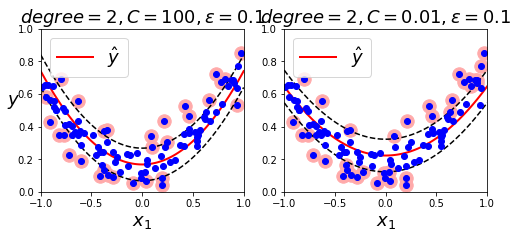

In [8]:
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(8, 3))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()